In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image

In [2]:
train_path= '../input/spine-fracture-prediction-from-xrays/cervical fracture/train'
test_path='../input/spine-fracture-prediction-from-xrays/cervical fracture/val'

In [3]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 3800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [5]:
Model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in Model.layers:
    layer.trainable=False
model = Sequential()
model.add(Model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

2022-11-13 17:19:31.968643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 17:19:31.978622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 17:19:31.979498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 17:19:31.980800: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
gaussian_noise (GaussianNois (None, 7, 7, 1280)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

In [6]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2)
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=call
    )

Epoch 1/10


2022-11-13 17:19:34.545661: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-13 17:19:38.027516: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 14s 190ms/step - loss: 0.7485 - accuracy: 0.6900 - precision: 0.7065 - recall: 0.6500 - auc: 0.7293 - val_loss: 0.8513 - val_accuracy: 0.5475 - val_precision: 0.5388 - val_recall: 0.6600 - val_auc: 0.6165

Epoch 00001: val_accuracy improved from -inf to 0.54750, saving model to best_model.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
50/50 [==============================] - 8s 169ms/step - loss: 0.5738 - accuracy: 0.7300 - precision: 0.7143 - recall: 0.7292 - auc: 0.8232 - val_loss: 0.5989 - val_accuracy: 0.6900 - val_precision: 0.7065 - val_recall: 0.6500 - val_auc: 0.7646

Epoch 00002: val_accuracy improved from 0.54750 to 0.69000, saving model to best_model.h5
Epoch 3/10
50/50 [==============================] - 8s 166ms/step - loss: 0.4954 - accuracy: 0.7700 - precision: 0.7312 - recall: 0.7640 - auc: 0.8387 - val_loss: 0.5434 - val_accuracy: 0.7475 - val_precision: 0.7054 - val_recall: 0.8500 - val_auc: 0.8190

Epoch 00003: val_accuracy improved from 0.69000 to 0.74750, saving model to best_model.h5
Epoch 4/10
50/50 [==============================] - 9s 181ms/step - loss: 0.5357 - accuracy: 0.7300 - precision: 0.7742 - recall: 0.6857 - auc: 0.8272 - val_loss: 0.6157 - val_accuracy: 0.7175 - val_precision: 0.6465 - val_recall: 0.9600 - val_auc: 0.8360

Epoch 00004: val_accuracy did not improve from 0.

In [16]:
model.evaluate(train_generator)

950/950 [==============================] - 54s 57ms/step - loss: 0.2295 - accuracy: 0.9116 - precision: 0.9035 - recall: 0.9216 - auc: 0.9767


[0.22950658202171326,
 0.9115789532661438,
 0.9035087823867798,
 0.9215789437294006,
 0.9767495393753052]

In [15]:
model.evaluate(validation_generator)

100/100 [==============================] - 6s 57ms/step - loss: 0.3065 - accuracy: 0.9075 - precision: 0.9095 - recall: 0.9050 - auc: 0.9667


[0.3065486550331116,
 0.9075000286102295,
 0.909547746181488,
 0.9049999713897705,
 0.9666625261306763]

[[0.06934937]]
THE UPLOADED SPINE CT IMAGE IS: Fracture


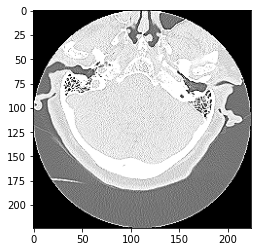

In [22]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('../input/spine-fracture-prediction-from-xrays/cervical fracture/val/fracture/CSFDV1B10 (11)-sharpened.png',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0) 
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"   
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED SPINE CT IMAGE IS: "+str(op))